In [168]:
import numpy as np
from scipy.stats import uniform, norm, f, t
from sklearn.linear_model import LinearRegression

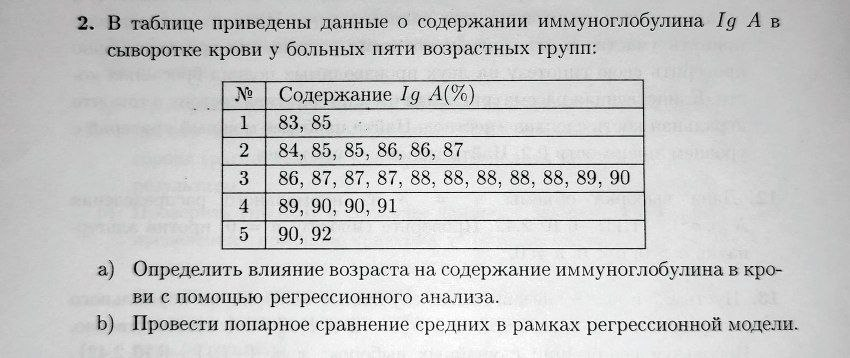

In [169]:
a = np.array([83,85])
b = np.array([84,85,85,86,86,87])
c = np.array([86,87,87,87,88,88,88,88,88,89,90])
d = np.array([89,90,90,91])
e = np.array([90,92])

In [170]:
# преобразуем в выборку с одним признаком (возрастом) и одномерным таргетом
y = np.array([83,85,84,85,85,86,86,87,86,87,87,87,88,88,88,88,88,89,90,89,90,90,91,90,92])
kols = np.array([len(a), len(b), len(c), len(d), len(e)])
N = np.sum(kols)

## a)

In [171]:
psi = np.zeros((5, N))
for k in range(kols[0]):
    psi[0, k] = 1
for i in range(1,5):
    for j in range(np.sum(kols[:i]), np.sum(kols[:i])+kols[i]):
        psi[i,j] = 1
psi = psi.T

In [178]:
TSS = np.sum(np.square(y - np.mean(y)))
F_inv = np.linalg.inv(np.diag(kols))
beta = F_inv@psi.T@y
RSS = (y - psi@beta).T @ (y - psi@beta)
R_sq = 1 - RSS/TSS
print('Коэффициент детерминации:', round(R_sq,2))

Коэффициент детерминации: 0.81


In [179]:
delta_est = R_sq**2/(1-R_sq**2) * (N - 5)/(5-1)
p_value = 1 - f.cdf(np.abs(delta_est), 5-1, N-1)
print('p_value:', round(p_value,4))

p_value: 0.0001


=> отвергаем гипотезу о незначимости коэффициента детерминации (считаем, что возраст влияет на содержание иммуноглобулина)

## b)

In [174]:
mid = np.array([np.mean(a),np.mean(b),np.mean(c),np.mean(d),np.mean(e)])
mid

array([84.        , 85.5       , 87.81818182, 90.        , 91.        ])

In [175]:
p_values = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        if i<j:
            delta = (mid[i]-mid[j]) / np.sqrt(RSS * (F_inv[i,i]+F_inv[j,j])) * (N-5)**0.5
            p_values[i,j] = 2*(1 - t.cdf(abs(delta), N-5))
            if p_values[i,j] < 0.05:
                print('отвергаем гипотезу о том, что среднее в группе', i+1, ' равно среднему в группе', j+1, sep='')
            else:
                print('нет оснований отвергнуть гипотезу о том, , что среднее в группе', i+1, ' равно среднему в группе', j+1, sep='')

нет оснований отвергнуть гипотезу о том, , что среднее в группе1 равно среднему в группе2
отвергаем гипотезу о том, что среднее в группе1 равно среднему в группе3
отвергаем гипотезу о том, что среднее в группе1 равно среднему в группе4
отвергаем гипотезу о том, что среднее в группе1 равно среднему в группе5
отвергаем гипотезу о том, что среднее в группе2 равно среднему в группе3
отвергаем гипотезу о том, что среднее в группе2 равно среднему в группе4
отвергаем гипотезу о том, что среднее в группе2 равно среднему в группе5
отвергаем гипотезу о том, что среднее в группе3 равно среднему в группе4
отвергаем гипотезу о том, что среднее в группе3 равно среднему в группе5
нет оснований отвергнуть гипотезу о том, , что среднее в группе4 равно среднему в группе5
